In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [2]:
%matplotlib widget

$$f^\dagger_X(t) \propto \exp\left(-i\frac{1}{2}\kappa t^2\right)f_X(t)$$

Then we can also consider $\Delta E(p_i)$ as a function of $p$:

$$\alpha(\mathbf{p}) = \Delta E(\mathbf{p_i}) = \frac{1}{2}\left(\mathbf{p}^2 + 2\mathbf{p}\mathbf{A_{IR}}(\tau) + \mathbf{A_{IR}}^2(\tau) - \mathbf{p_0}^2\right)$$

and then
$$a(\mathbf{p}, \tau) = \int_{-\infty}^{\infty} dt e^{-t^2 \mu} e^{i\alpha t} = \sqrt{\frac{\pi}{\mu}} e^{-\alpha^2/(4\mu)}$$

$$\mu = \frac{1}{2\sigma^2} + i\frac{\kappa}{2} + \frac{1}{2}i \mathbf{p_i} \mathbf{F_{IR}}(\tau)$$

In [3]:
# conversion function between atomic unit energies and eV 
PToEv = lambda p:  p*27.21
EvToP = lambda Ev:  Ev/27.21

# and atomic time and fsec 
autTtoFsec = lambda a: a*2.41e-2
FsecToaut = lambda f: f/2.41e-2

In [4]:
# envelope for gauss pulse
def f_ir(tau, sigma_IR):
    return np.exp(-tau**2/(2*sigma_IR**2))

In [5]:
# envelope for gauss pulse
def f_xuv(tau, sigma_XUV):
    return np.exp(-tau**2/(2*sigma_XUV**2))

In [6]:
def F_IR(tau, sigma_IR, F_const_IR, omega_IR, phase = 0):
    return F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau + phase)

In [7]:
def F_XUV(t, sigma_XUV, F_const_XUV, omega_XUV, phase = 0):
    return F_const_XUV * f_xuv(t, sigma_XUV) * np.cos(omega_XUV * t + phase)

In [8]:
# vector potential
def A_ir(tau, sigma_IR, F_const_IR, omega_IR):
    # only sin
    return - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR*tau) / omega_IR

In [9]:
# all times in femtoseconds
def a(p, tau, kappa=0.1, fwhm_xuv=0.3, fwhm_ir=6, F_intensity_IR=1./200, phase = 0):
    omega_X = 2.5
    I_p = 0.5
    p_0_sq = 2 * (omega_X - I_p)
    # from femtosecond fwhm to atomic time units
    sigma_XUV = fwhm_xuv / (2*np.sqrt(2*np.log(2))) / 2.41e-2
    
    F_const_IR = F_intensity_IR
    omega_IR = 0.05
    # from femtosecond fwhm to atomic time units
    sigma_IR = fwhm_ir/(2*np.sqrt(2*np.log(2))) / 2.41e-2

    # gaussian envelope
    f_ir_cal = np.exp(-tau**2/(2*sigma_IR**2))

    # electric field
    F_ir_calc = F_const_IR * f_ir(tau, sigma_IR) * np.cos(omega_IR * tau + phase)

    # vector potential
    A_ir_calc = - F_const_IR * f_ir(tau, sigma_IR) * np.sin(omega_IR * tau + phase) / omega_IR
    
    alpha = 0.5*(p**2 + 2*p*A_ir_calc - p_0_sq)
    mu = 1/(2*sigma_XUV**2) + 0.5j*kappa + 0.5j*(p + A_ir_calc) * F_ir_calc  # where (p + A_ir) is the brackets for p_i 

    f = np.sqrt(np.pi/mu) * np.exp(-alpha**2/(4*mu))
    print(f"kappa = {kappa:.2f}, sigma_xuv = {sigma_XUV:.2f}, sigma_ir = {sigma_IR:.2f}, F_intensity_IR = {F_intensity_IR:.1e}")
    return np.abs(f).T

kappa = 0.10, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

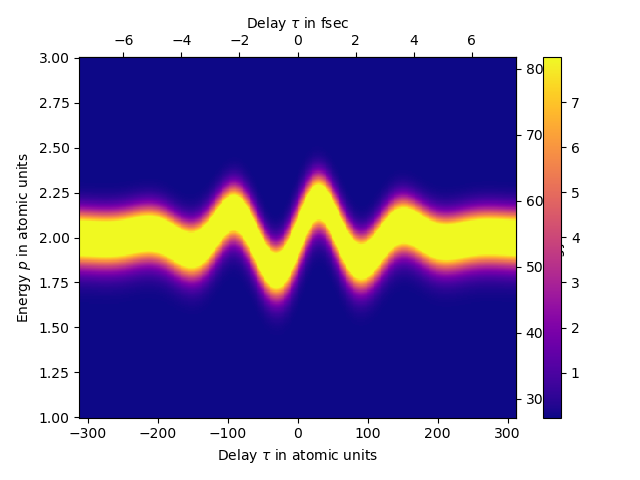

In [28]:
fig = plt.figure()
plt.xlabel(r"Delay $\tau$ in atomic units")
plt.ylabel(r"Energy $p$ in atomic units")
ax = plt.gca()
secy = ax.secondary_yaxis('right', functions=(PToEv, EvToP))
secx = ax.secondary_xaxis('top', functions=(autTtoFsec, FsecToaut))
secy.set_ylabel("Energy $E$ in eV")
secx.set_xlabel(r"Delay $\tau$ in fsec")

p = np.linspace(1, 3, 300)
tau = np.linspace(FsecToaut(-7.5) , FsecToaut(7.5), 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)

plot2d = plt.pcolormesh(tau, p, res, cmap='plasma')
#cbaxes = fig.add_axes([1, 0.15, 0.03, 0.7])

plt.colorbar(plot2d)# , cax=cbaxes)
fig.tight_layout()

def update(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100, phase=0):
    plot2d.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR, phase=phase))
    fig.canvas.draw_idle()
    
interact(update, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.05, 0.0001), phase = (-np.pi, np.pi, 0.0001));

kappa = 0.10, sigma_xuv = 5.29, sigma_ir = 105.72, F_intensity_IR = 5.0e-03


interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

interactive(children=(FloatSlider(value=0.001, description='kappa', max=0.3, step=0.001), FloatSlider(value=0.…

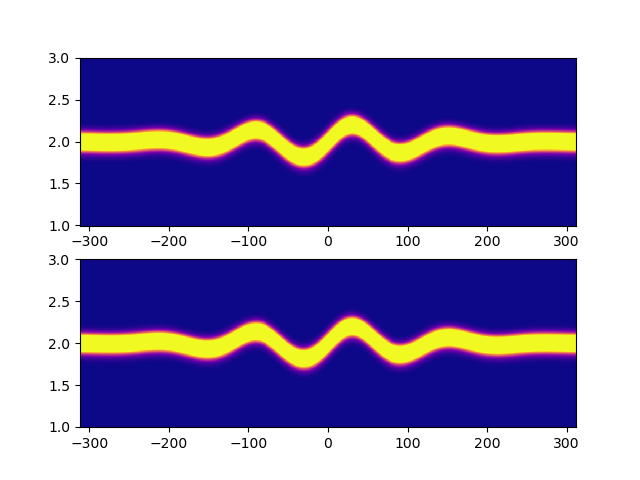

In [31]:
p = np.linspace(1, 3, 300)
tau = np.linspace(-7.5/ 2.41e-2, 7.5/2.41e-2, 500)
pp, tautau = np.meshgrid(p, tau)
res = a(pp, tautau)**2

fig, axs = plt.subplots(2, 1)

plot2d_top = axs[0].pcolormesh(tau, p, res, cmap='plasma')
plot2d_down = axs[1].pcolormesh(tau, p, res, cmap='plasma')

def update_up(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_top.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()

def update_down(kappa = 1e-3, fwhm_xuv=0.3, F_intensity_IR=1./100):
    plot2d_down.set_array(a(pp, tautau, kappa=kappa, fwhm_xuv=fwhm_xuv, F_intensity_IR=F_intensity_IR)**2)
    fig.canvas.draw_idle()
    
interact(update_up, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));
interact(update_down, kappa = (0.0, 0.3, 0.001), fwhm_xuv = (0.05, 0.6, 0.01), F_intensity_IR = (0., 0.02, 0.0001));